In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_table('smsspamcollection.tsv')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [4]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

#### Data is imbalanced we can use multinomial NB 

#### Taking spam and ham words using wordcloud because we can not encode message so we use wordcloud

#### stopword : stopwords are the word not use for classfication. for example, i,is,the

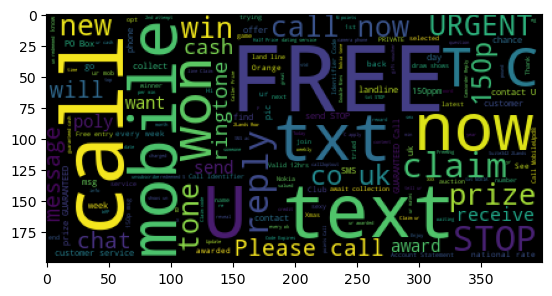

In [5]:
from wordcloud import WordCloud
wc = WordCloud()
wc.generate(' '.join(df[df['label']=='spam'] ['message']))
plt.imshow(wc)
plt.show()

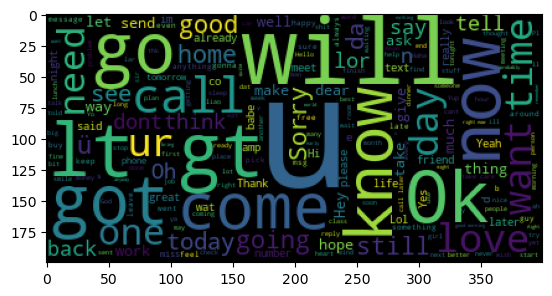

In [6]:
from wordcloud import WordCloud
wc = WordCloud()
wc.generate(' '.join(df[df['label']=='ham'] ['message']))
plt.imshow(wc)
plt.show()

#### x & y split
my x & y bothshould be in 1 D array

In [7]:
x=df['message']
y=df['label']

vectorization

count_vector

#### vectorization : we can not encode message so we can convert into count_vector by using vectorization 

## example :

In [8]:
msg = ['i love python','python is fun','i love datascience','datascience is fun']
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
newx = cv.fit_transform(msg).toarray()
newx

array([[0, 0, 0, 1, 1],
       [0, 1, 1, 0, 1],
       [1, 0, 0, 1, 0],
       [1, 1, 1, 0, 0]], dtype=int64)

In [9]:
cv.get_feature_names()

['datascience', 'fun', 'is', 'love', 'python']

#### vectorization on x

In [10]:
x = cv.fit_transform(x).toarray()

In [11]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
cv.get_feature_names()

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '084

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [14]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.metrics import classification_report

In [15]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    train_score = model.score(xtrain,ytrain)
    test_score = model.score(xtest,ytest)
    cr= classification_report(ytest,ypred)
    print(f'Training Accuracy : {train_score} Testing Accuracy : {test_score}')
    print(f'classification report :\n {cr}')

In [16]:
mymodel(BernoulliNB())

Training Accuracy : 0.9867623962306484 Testing Accuracy : 0.9847533632286996
classification report :
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99       968
        spam       0.98      0.90      0.94       147

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [17]:
mymodel(MultinomialNB())

Training Accuracy : 0.9923715503702042 Testing Accuracy : 0.989237668161435
classification report :
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       968
        spam       0.95      0.97      0.96       147

    accuracy                           0.99      1115
   macro avg       0.97      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [18]:
mymodel(GaussianNB())

Training Accuracy : 0.9470495849225937 Testing Accuracy : 0.9022421524663677
classification report :
               precision    recall  f1-score   support

         ham       0.99      0.90      0.94       968
        spam       0.58      0.95      0.72       147

    accuracy                           0.90      1115
   macro avg       0.79      0.92      0.83      1115
weighted avg       0.94      0.90      0.91      1115



#### Predicting New observation

In [19]:
msg1='Free..! Free..! Buy 1 Get 1 Free'
msg2='There will be on lecture today'

In [20]:
def mypredict(t):
    t = cv.transform([t]).toarray()
    mn=MultinomialNB()
    mn.fit(xtrain,ytrain)
    ypred = mn.predict(t)
    return ypred[0]

In [21]:
mypredict(msg1)

'spam'

In [22]:
mypredict(msg2)

'ham'